In [21]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

pd.set_option('display.max_columns', None)

In [11]:
path_to_car_insurance_data = os.path.expanduser("~/Downloads/driving_incident_rates_by_state_000.csv")

df = pd.read_csv(path_to_car_insurance_data)

In [13]:
(
    df
    [['state_name', 'drivers_with_dui']]
    .sort_values('drivers_with_dui', ascending=False)
    .assign(drivers_with_dui=lambda df_: df_['drivers_with_dui'] * 100)
)

,state_name,drivers_with_dui
32,Wyoming,2.73
12,North Dakota,2.50
36,Alaska,2.01
31,South Dakota,1.83
30,Iowa,1.78
45,Idaho,1.70
11,Nebraska,1.68
22,Minnesota,1.55
16,Montana,1.55
29,Wisconsin,1.53


In [10]:
nyc = gpd.read_file("nyc.geojson")

In [29]:
label_map = {
    "Chelsea": "B",
    "Tribeca": "A",
    "Harlem": "C",
    "Financial District": "D",
    "Hell's Kitchen": "E",
    "Greenwich Village": "F",
}

to_plot = (
    nyc
    .loc[lambda df_: df_['borough'] == 'Manhattan', ['neighborhood', 'geometry']]
    .assign(label=lambda df_: df_['neighborhood'].map(label_map))
    .loc[lambda df_: df_['label'].notnull()]
    .to_crs(epsg=3857)
)

<AxesSubplot:>

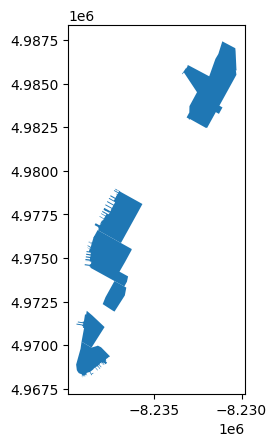

In [ ]:
# Convert to Web Mercator
to_plot_web = to_plot.to_crs(epsg=3857)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 16))

# Set the bounds of the plot to just Manhattan
# Get the bounds of only the labeled areas
labeled_areas = to_plot_web[to_plot_web['label'].notna()]
bounds = labeled_areas.total_bounds  # [minx, miny, maxx, maxy]

# Add some padding (5% on each side)
padding = 0.05
x_padding = (bounds[2] - bounds[0]) * padding
y_padding = (bounds[3] - bounds[1]) * padding
bounds = [
    bounds[0] - x_padding,  # minx
    bounds[1] - y_padding,  # miny
    bounds[2] + x_padding,  # maxx
    bounds[3] + y_padding   # maxy
]

# Set the plot limits
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Add basemap
ctx.add_basemap(ax, 
                source=ctx.providers.CartoDB.Positron,
                zoom=12)

# Plot boundaries
to_plot_web.boundary.plot(ax=ax, color='black', linewidth=3)

# Add labels
for idx, row in to_plot_web.iterrows():
    if pd.notna(row['label']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['label'], 
                fontsize=15, 
                ha='center', 
                va='center',
                bbox=dict(facecolor='white', 
                         alpha=0.7,
                         edgecolor='none',
                         boxstyle='round'))

# Remove axes
ax.axis('off')

# Show the plot
plt.show()

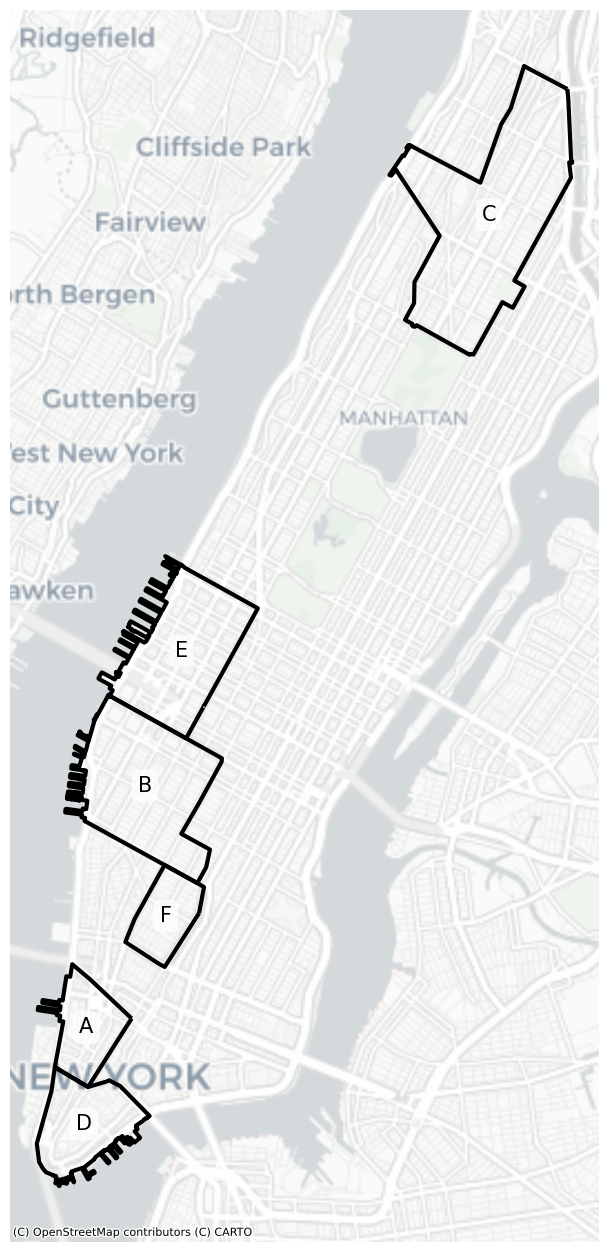